# data prep

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/diabetes.csv")

# delete broken data
df = df.dropna(how='any',axis=0)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
OUTPUT_KEY = "Outcome"

X = df.drop(OUTPUT_KEY, axis=1).values
y = df[OUTPUT_KEY].values

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train

array([[  9.   , 145.   ,  80.   , ...,  37.9  ,   0.637,  40.   ],
       [ 10.   , 129.   ,  62.   , ...,  41.2  ,   0.441,  38.   ],
       [  7.   , 102.   ,  74.   , ...,  37.2  ,   0.204,  45.   ],
       ...,
       [ 13.   , 126.   ,  90.   , ...,  43.4  ,   0.583,  42.   ],
       [  4.   , 171.   ,  72.   , ...,  43.6  ,   0.479,  26.   ],
       [  9.   , 102.   ,  76.   , ...,  32.9  ,   0.665,  46.   ]])

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [6]:
scaled_X_test

,x0,x1,x2,x3,x4,x5,x6,x7
0,0.983349,0.499364,0.221374,0.163148,0.475490,-0.754147,0.414461,1.556484
1,-0.837522,0.951906,-0.568830,-1.461839,-0.755266,-0.742774,-0.942882,-0.952995
2,0.679871,-0.315212,-0.568830,0.225648,-0.755266,-0.867875,-0.864574,-0.520327
3,-0.230565,-1.763347,0.672920,0.288147,-0.755266,0.201165,-0.757262,1.123815
4,-0.837522,-0.104026,0.447147,0.350647,0.885742,0.394502,-0.023485,-0.693394
...,...,...,...,...,...,...,...,...
149,0.679871,-0.616907,-0.568830,-0.274348,-0.262964,-0.651792,-0.020585,-0.087658
150,-0.230565,-0.134195,-0.230171,0.975642,0.521073,0.621957,-1.026991,-0.433793
151,1.286828,2.068176,0.447147,-1.461839,-0.755266,1.736488,-1.064695,0.864214
152,0.376392,0.499364,0.672920,-1.461839,-0.755266,-3.711065,0.394159,3.114093


# model

In [7]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.Dense(units=16, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid"),
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5)],
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

model.fit(X_test, y_test, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - binary_accuracy: 0.3925 - loss: 11.0395
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.4007 - loss: 3.7114
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - binary_accuracy: 0.6275 - loss: 1.8069
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.6817 - loss: 2.0379
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - binary_accuracy: 0.6267 - loss: 1.1364
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - binary_accuracy: 0.5074 - loss: 1.0036
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.5195 - loss: 0.8125
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.6544 - loss: 0.8180
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.6518 - loss: 0.7307
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - binary_accuracy: 0.5946 - loss: 0.7216
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.7034 - loss: 0.6

In [8]:
model.metrics_names

['loss', 'compile_metrics']

In [9]:
model.evaluate(X_train, y_train)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.6847 - loss: 0.6494  


[0.6644132733345032, 0.6775244474411011]

In [10]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.7845 - loss: 0.4531


[0.4587058424949646, 0.7792207598686218]

In [11]:
X_test.shape

(154, 8)

In [12]:
X_test[0]

array([  7.   , 136.   ,  74.   ,  26.   , 135.   ,  26.   ,   0.647,
        51.   ])

In [13]:
scaled_X_train.shape

(614, 8)

In [14]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [15]:
y_pred

array([[0.5630237 ],
       [0.47272667],
       [0.54036963],
       [0.0173476 ],
       [0.0742602 ],
       [0.38346255],
       [0.468821  ],
       [0.2199385 ],
       [0.13995034],
       [0.21015775],
       [0.4417028 ],
       [0.11838686],
       [0.9389102 ],
       [0.6400046 ],
       [0.39627734],
       [0.5185273 ],
       [0.4830013 ],
       [0.25735238],
       [0.27031323],
       [0.39758167],
       [0.35194525],
       [0.29026043],
       [0.90296483],
       [0.4354248 ],
       [0.16879703],
       [0.4552288 ],
       [0.09391597],
       [0.6452432 ],
       [0.01297914],
       [0.56285775],
       [0.31199378],
       [0.14382854],
       [0.11037469],
       [0.1736772 ],
       [0.37516055],
       [0.41401073],
       [0.29328907],
       [0.1290653 ],
       [0.06265195],
       [0.3564487 ],
       [0.1143603 ],
       [0.12090115],
       [0.03042732],
       [0.17097315],
       [0.13333902],
       [0.3902307 ],
       [0.9545335 ],
       [0.768

# choosing threshold

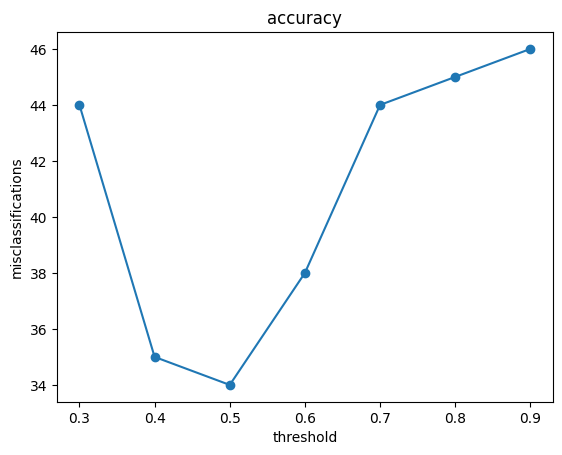

In [16]:
import matplotlib.pyplot as plt

THRESHOLD_RANGE = np.arange(0.3, 0.9, 0.1)
misclassifications = []

for THRESHOLD in THRESHOLD_RANGE:
    misclassifications.append(y_test[(y_pred.T[0] > THRESHOLD) != y_test].shape[0])

plt.plot(THRESHOLD_RANGE, misclassifications, marker='o')
plt.title('accuracy')
plt.xlabel('threshold')
plt.ylabel('misclassifications')
plt.show() 

so 0.5 threshold is optimal